In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('dataset.csv')


In [3]:
df

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month
...,...,...,...,...,...
40427,40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,i read review say bra ran small i order two ba...
40428,40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,i n't sure exactli would it littl larg small s...
40429,40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,you wear hood wear hood wear jacket without ho...
40430,40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,i like noth dress the reason i gave star i ord...


## STEPS FOR PROJECT COMPLETION:
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website 
8. Deploy

## 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40432 non-null  int64  
 1   category    40432 non-null  object 
 2   rating      40432 non-null  float64
 3   label       40432 non-null  object 
 4   text_       40431 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


In [5]:
df.drop(columns =['Unnamed: 0','category','rating'], inplace = True)

In [6]:
df

,label,text_
0,CG,love well made sturdi comfort i love veri pretti
1,CG,love great upgrad origin i 've mine coupl year
2,CG,thi pillow save back i love look feel pillow
3,CG,miss inform use great product price i
4,CG,veri nice set good qualiti we set two month
...,...,...
40427,OR,i read review say bra ran small i order two ba...
40428,CG,i n't sure exactli would it littl larg small s...
40429,OR,you wear hood wear hood wear jacket without ho...
40430,CG,i like noth dress the reason i gave star i ord...


In [7]:
df = df.dropna(subset=['text_', 'label'])

In [8]:
df.isnull().sum()

label    0
text_    0
dtype: int64

In [9]:
df.dropna(subset=['text_'], inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_4060\1295578572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['text_'], inplace=True)


In [10]:
df.isnull().sum()

label    0
text_    0
dtype: int64

In [11]:
df.duplicated().sum()

44

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
X = df['text_']
y = df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
df.rename(columns={'label':'Target', 'text_':'Review'}, inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['Target'] = encoder.fit_transform(df['Target'])

In [18]:
df.sample(5)

,Target,Review
19064,1,i love led bulb today i took multimet measur c...
13062,0,wow anim good the stori slow there mani horrib...
25638,1,to go much im glad farrah prayer final answer ...
30997,1,thi i read book club i 'm sound great i first ...
9030,1,i may buy replac ear piec wear normal use our ...


In [19]:
df.head

<bound method NDFrame.head of        Target                                             Review
0           0   love well made sturdi comfort i love veri pretti
1           0     love great upgrad origin i 've mine coupl year
2           0       thi pillow save back i love look feel pillow
3           0              miss inform use great product price i
4           0        veri nice set good qualiti we set two month
...       ...                                                ...
40427       1  i read review say bra ran small i order two ba...
40428       0  i n't sure exactli would it littl larg small s...
40429       1  you wear hood wear hood wear jacket without ho...
40430       0  i like noth dress the reason i gave star i ord...
40431       1  i work wed industri work long day foot outsid ...

[40387 rows x 2 columns]>

## 2. EDA

In [20]:
df['Target'].value_counts()

1    20215
0    20172
Name: Target, dtype: int64

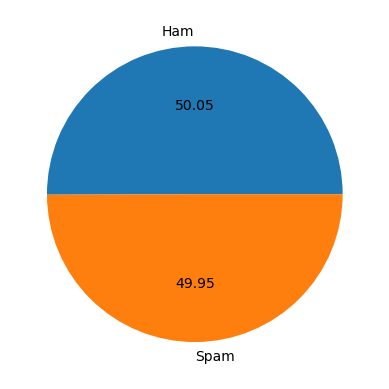

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['Review'].apply(len)

In [25]:
df.head()

,Target,Review,num_characters
0,0,love well made sturdi comfort i love veri pretti,48
1,0,love great upgrad origin i 've mine coupl year,46
2,0,thi pillow save back i love look feel pillow,44
3,0,miss inform use great product price i,37
4,0,veri nice set good qualiti we set two month,43


In [26]:
df['num_words'] = df['Review'].apply(lambda x : len(nltk.word_tokenize(x)))

In [27]:
df.head()

,Target,Review,num_characters,num_words
0,0,love well made sturdi comfort i love veri pretti,48,9
1,0,love great upgrad origin i 've mine coupl year,46,9
2,0,thi pillow save back i love look feel pillow,44,9
3,0,miss inform use great product price i,37,7
4,0,veri nice set good qualiti we set two month,43,9


In [28]:
df['num_sentences'] = df['Review'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Target,Review,num_characters,num_words,num_sentences
0,0,love well made sturdi comfort i love veri pretti,48,9,1
1,0,love great upgrad origin i 've mine coupl year,46,9,1
2,0,thi pillow save back i love look feel pillow,44,9,1
3,0,miss inform use great product price i,37,7,1
4,0,veri nice set good qualiti we set two month,43,9,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,40387.000000,40387.000000,40387.000000
mean,205.906678,38.210786,1.004110
std,219.493038,39.511392,0.080439
min,8.000000,1.000000,1.000000
25%,64.000000,12.000000,1.000000
50%,116.000000,22.000000,1.000000
75%,253.000000,48.000000,1.000000
max,2232.000000,322.000000,9.000000


In [31]:
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20215.000000,20215.000000,20215.000000
mean,237.895869,43.042642,1.006926
std,252.927000,44.359128,0.094110
min,8.000000,1.000000,1.000000
25%,74.000000,14.000000,1.000000
50%,134.000000,25.000000,1.000000
75%,296.000000,54.000000,1.000000
max,2232.000000,322.000000,4.000000


In [32]:
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20172.000000,20172.000000,20172.000000
mean,173.849296,33.368630,1.001289
std,174.062547,33.270605,0.063746
min,13.000000,2.000000,1.000000
25%,57.000000,11.000000,1.000000
50%,100.000000,19.000000,1.000000
75%,217.000000,42.000000,1.000000
max,1300.000000,229.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

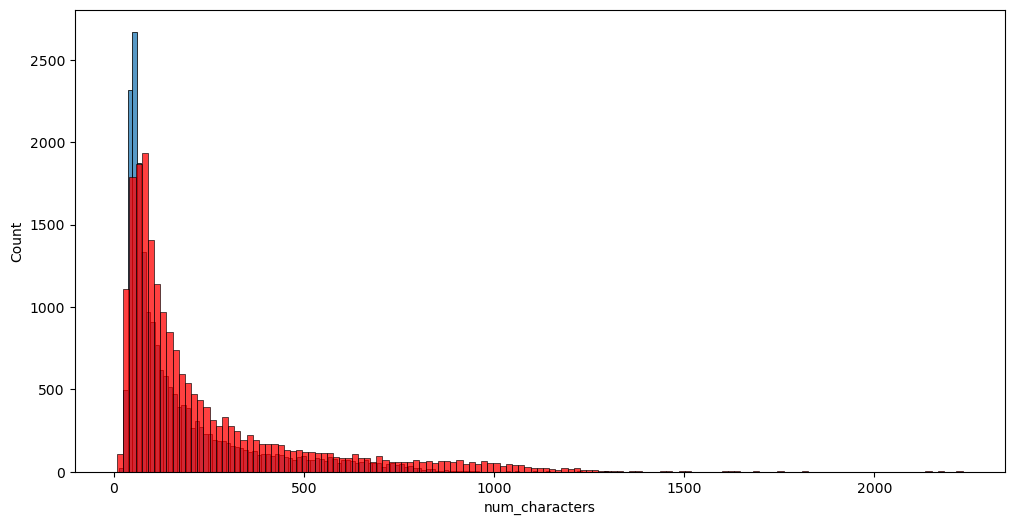

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

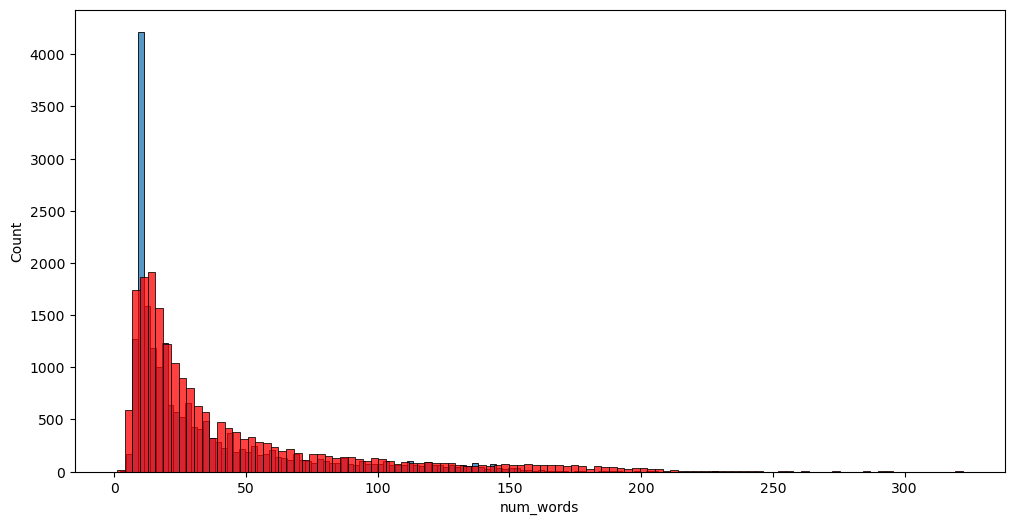

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')

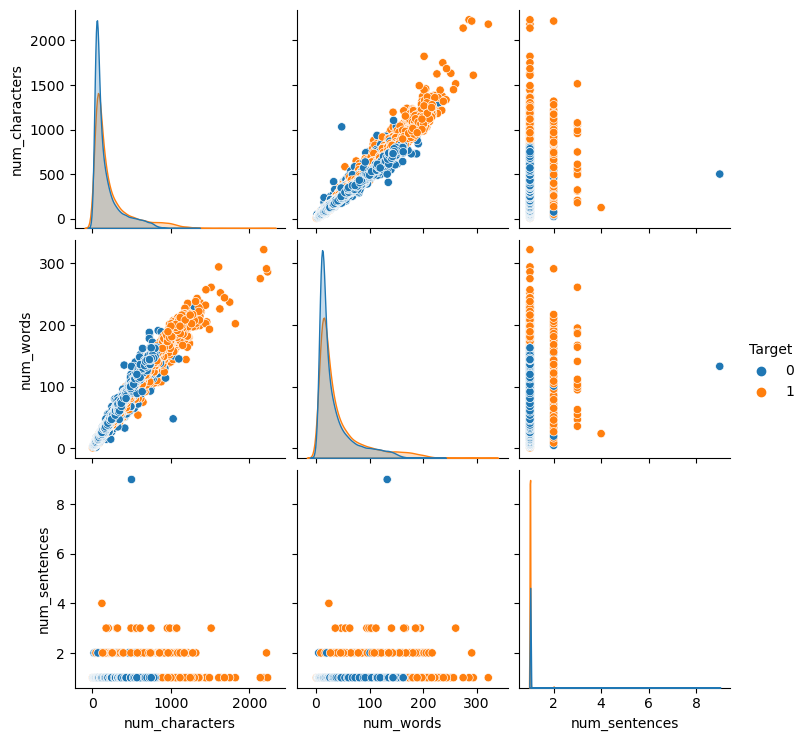

In [36]:
sns.pairplot(df,hue='Target')

C:\Users\dell\AppData\Local\Temp\ipykernel_4060\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

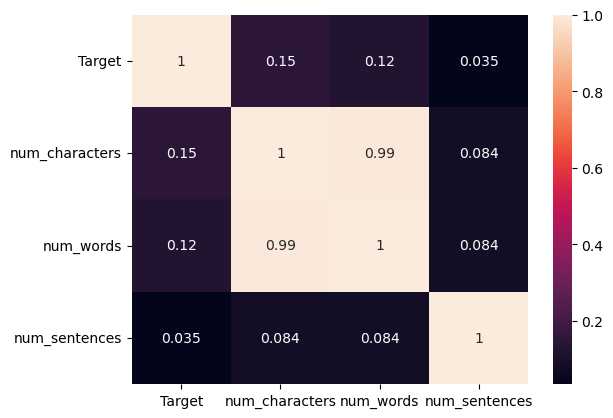

In [37]:
sns.heatmap(df.corr(), annot=True)

# # 3. Data Preprocessing
1. Lowercase
2. Tokenization
3. Removing Stop words
4. Removing Stop words and Punctuation
5. Stemming

In [38]:
#FOR STOPWORDS:
from nltk.corpus import stopwords
#FOR PUNCTUATIONS:
import string
#FOR STEMMING:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
def transform_text(Review):
    #TO LOWER CASE:
    Review = Review.lower()
    
    #FOT TOKENIZATION: 
    Review = nltk.word_tokenize(Review)
    
    #REMOVING SPECIAL CHARACTERS:
    y = []
    for i in Review:
        if i.isalnum():
            y.append(i)
            
    #FOR REMOVING STOP WORDS AND PUNCTUATIONS:
    Review = y[:]
    y.clear()
    
    for i in Review:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #FOR STEMMING:
    Review = y[:]
    y.clear()
    
    for i in Review:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [40]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [41]:
def transform_text(text):
    
    df['transformed_text'] = df['Review'].apply(transform_text)


In [42]:
X.shape

(40387,)

In [43]:
y = df['Target'].values

In [44]:
y

array([0, 0, 0, ..., 1, 0, 1])

## 4. Model Building

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [48]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [51]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [52]:
X_test_tfidf = vectorizer.transform(X_test)

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [54]:
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred = rf_model.predict(X_test_tfidf)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [57]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8269373607328546
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      3968
           1       0.86      0.79      0.82      4110

    accuracy                           0.83      8078
   macro avg       0.83      0.83      0.83      8078
weighted avg       0.83      0.83      0.83      8078



In [58]:
new_data = ["order place special photo wall we 've coupl week","easi review the kid dd love thank"]
new_data_tfidf = vectorizer.transform(new_data)
new_predictions = rf_model.predict(new_data_tfidf)
for review, prediction in zip(new_data, new_predictions):
    print(f"Review: {review}")
    print(f"Predicted Label: {prediction}")
    print("------------------------")

Review: order place special photo wall we 've coupl week
Predicted Label: 0
------------------------
Review: easi review the kid dd love thank
Predicted Label: 0
------------------------


In [59]:
# Assuming 'new_data' is a list of new text reviews
new_data = ["This is a very good.", "babi like thermal insul help keep food warmer the thermal insul help keep.", "Great experience!"]

# Transform the new data using the same TfidfVectorizer
new_data_tfidf = vectorizer.transform(new_data)

# Make predictions on the new data
new_predictions = rf_model.predict(new_data_tfidf)

# Display the predictions
for review, prediction in zip(new_data, new_predictions):
    print(f"Review: {review}")
    print(f"Predicted Label: {prediction}")
    print("------------------------")


Review: This is a very good.
Predicted Label: 1
------------------------
Review: babi like thermal insul help keep food warmer the thermal insul help keep.
Predicted Label: 0
------------------------
Review: Great experience!
Predicted Label: 1
------------------------


In [60]:
new_data = ["product is very bad|","very costly","love product","bad product","worst experience","amazing product","very useful love it","did'nt like product","not working"]
new_data_tfidf = vectorizer.transform(new_data)
new_predictions = rf_model.predict(new_data_tfidf)
for review, prediction in zip(new_data, new_predictions):
    print(f"Review: {review}")
    print(f"Predicted Label: {prediction}")
    print("------------------------")

Review: product is very bad|
Predicted Label: 1
------------------------
Review: very costly
Predicted Label: 0
------------------------
Review: love product
Predicted Label: 0
------------------------
Review: bad product
Predicted Label: 1
------------------------
Review: worst experience
Predicted Label: 0
------------------------
Review: amazing product
Predicted Label: 0
------------------------
Review: very useful love it
Predicted Label: 0
------------------------
Review: did'nt like product
Predicted Label: 1
------------------------
Review: not working
Predicted Label: 0
------------------------


In [61]:
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(rf_model, open('model.pkl', 'wb'))

## Web Scrapping


In [62]:
import requests
from bs4 import BeautifulSoup
import csv

def scrape_reviews(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    reviews = []
    review_elements = soup.find_all('div', class_='a-section review aok-relative')

    for review in review_elements:
        try:
            review_body = review.find('span', class_='a-size-base review-text review-text-content').text.strip()
            reviews.append([review_body])
        except AttributeError:
            pass
    
    return reviews

def save_to_csv(reviews, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Review'])
        csv_writer.writerows(reviews)

if __name__ == "__main__":
    url = 'https://www.amazon.in/Red-Tape-Sneaker-Cushion-Slip-Resistance/product-reviews/B0C9HVN6CC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    reviews = scrape_reviews(url)
    save_to_csv(reviews, 'amazon_reviews.csv')
    print("Reviews scraped and saved to amazon_reviews.csv")

Reviews scraped and saved to amazon_reviews.csv


In [66]:
#STORING THE REVIEWS SCRAPPED INTO INTO DATAFRAME:
ws = pd.read_csv("amazon_reviews.csv")

In [67]:
ws

,Review
0,more comfort and unique in colour
1,"In terms of quality the product is good, it is..."
2,Nice fit and good quality shoes
3,The shoe has cool comfort from inside. Good to...
4,"Usage:Worn for tough, everyday activities.Like..."
5,Built quality good but inner side material is ...
6,"Its a steal deal @1100 💥...Best in comfort, lo..."
7,Not smooth as premium products like Nike and A...
8,It’s original and good quality but it is littl...
9,Mst


In [68]:
#PREDICTING FOR ENTIRE SCRAPPED REVIEWS:

# Load the dataset
data = pd.read_csv('amazon_reviews.csv')
ws = data['Review']

#Vectorizing data and predicting Spam/Non-Spam using Model:
vectorized_data = vectorizer.transform(ws)
predictions = rf_model.predict(vectorized_data)

#Printing Predictions:
for review, prediction in zip(ws, predictions):
    print(f"Review: {review}")
    print(f"Predicted Label: {prediction}")
    print("------------------------")


Review: more comfort and unique in colour
Predicted Label: 0
------------------------
Review: In terms of quality the product is good, it is stylish, and comfortable, good for winter season. But if you have foot size 28 cm then buy 8 number shoe... I hope this will be helpful.
Predicted Label: 1
------------------------
Review: Nice fit and good quality shoes
Predicted Label: 1
------------------------
Review: The shoe has cool comfort from inside. Good to use strong from outside. Mostly I like the comfort I'll buy one more.
Predicted Label: 0
------------------------
Review: Usage:Worn for tough, everyday activities.Likes:Attractive design, particularly at a discounted price during a sale. Perceived durability. Rubber sole layer reduces skidding.Dislikes:Heavier than expected, despite being labeled as lightweight.Conclusion:These sneakers offer style and durability, especially with the added rubber sole layer for improved traction. However, they may not meet expectations for lightweig